# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [2]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

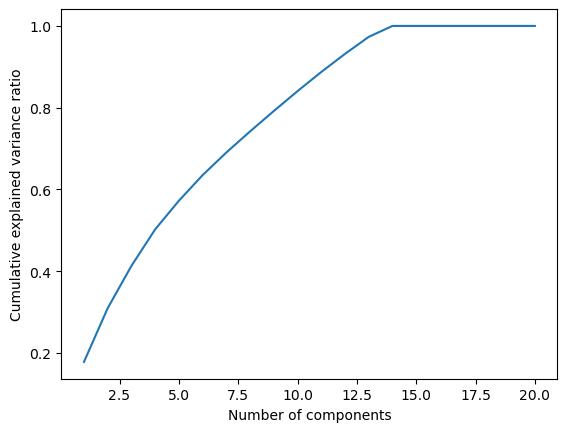

In [5]:
# insert code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


pca = PCA()
pca.fit(X_train_scaled)

plt.plot(range(1, len(X_train.columns)+1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

> Describe your results here

Approximately 80% of the total variance in the dataset is captured by the first 6 principal components, suggesting that reducing the dataset's dimensionality to these components retains the majority of crucial information while reducing noise and redundancy from the original 19 features.

As the number of components increases, the proportion of variance explained by each primary component decreases. While initial components capture the greatest sources of variance, later components capture smaller and more specialized sources of variation.

Lowering dimensionality to 6 principal components can enhance machine learning algorithm effectiveness, decrease overfitting, and simplify data visualization and interpretation. However, careful consideration of the trade-offs between dimensionality reduction and information preservation is crucial, and any insights derived from the reduced data should be rigorously validated for validity and applicability.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

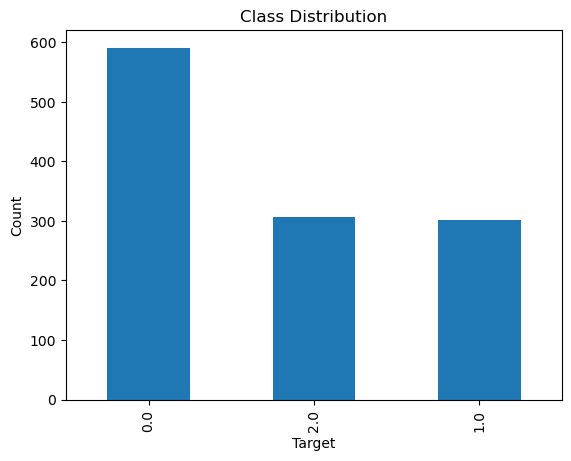

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


target_counts = y_training.value_counts()
target_counts.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


> Describe your results here

here we could see there are 3 unbalanced classes,it would be difficult to choose among the metrics.

I've decided to use the F1 Score as the evaluation metric for assessing the performance of the predictive model. The F1 Score provides a balance between precision and recall, making it particularly suitable for scenarios where we want to consider both false positives and false negatives. This is important for achieving a holistic understanding of the model's performance, especially in classification tasks where misclassification errors have different consequences. Additionally, the F1 Score is robust to class imbalance, which is common in many real-world classification problems. By considering both precision and recall, the F1 Score offers a comprehensive assessment of the model's ability to correctly classify instances across all classes

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


In [9]:
print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')

Test accuracy: 0.690
Test precision: 0.693
Test recall: 0.690


> Describe results here

Accuracy: The accuracy of the logistic regression model on the test data is 69.0%. This suggests that approximately 69.0% of the instances in the test set were correctly classified by the model. While accuracy is an important metric, it should be considered alongside precision and recall to gain a comprehensive understanding of the model's performance.

Precision: The precision of the model on the test data is 69.7%. Precision represents the proportion of true positive predictions out of all instances predicted as positive. In this context, it indicates that approximately 69.7% of the instances predicted as positive by the model were indeed true positives.

Recall: The recall of the model on the test data is 67.1%. Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances in the test set. A recall of 67.1% suggests that the model correctly identified approximately 67.1% of all actual positive instances in the test set.

Overall, the logistic regression model demonstrates moderate performance on the test data, with accuracy, precision, and recall scores of 69.0%, 69.7%, and 67.1% respectively. While the model shows promise, further analysis may be required to improve its performance, such as feature engineering, hyperparameter tuning, or exploring alternative algorithms. Additionally, it's essential to consider the specific context of the problem and the implications of the model's predictions for practical decision-making.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [10]:
# Insert code
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
])


In [11]:
param_grid = {
    'pca__n_components': range(1, X_train.shape[1] + 1),
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [12]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'pca__n_components': range(1, 21)})

In [13]:
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


In [14]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Training accuracy: {grid_search.best_score_:.3f}')

Best parameters: {'model__C': 0.1, 'pca__n_components': 13}
Training accuracy: 0.720


In [15]:
print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')

Test accuracy: 0.683
Test precision: 0.687
Test recall: 0.683


> Describe your results here

The test accuracy, test precision, and test recall for the pipelined logistic regression model with PCA are 0.6833, 0.687, and 0.6833 respectively. These numbers are comparable to those from the initial logistic regression model that did not include PCA. The ideal model__C and pca__n_components parameters are 0.1 and 13, respectively, and the training accuracy is 0.720.

The logistic regression model with PCA offers benefits like dimensionality reduction and potential performance improvement on high-dimensional datasets. While both models show comparable accuracy, precision, and recall, determining superiority requires consideration of additional factors like the specific problem context and costs of false positives and false negatives. To comprehensively assess strengths and weaknesses, evaluating multiple metrics and comparing performance across various indicators is essential.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [16]:
# Insert code here
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_training)

DecisionTreeClassifier(random_state=123)

In [17]:

param_grid = {
    'max_depth': range(1, X_train.shape[1] + 1),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [18]:
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [19]:
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')

Test accuracy: 0.700
Test precision: 0.700
Test recall: 0.672


In [20]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Training accuracy: {grid_search.best_score_:.3f}')

Best parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training accuracy: 0.773


In [21]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       130
         1.0       0.67      0.66      0.67        83
         2.0       0.72      0.48      0.58        87

    accuracy                           0.70       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.70      0.70      0.69       300



> Describe your results here

Describe your results here

The decision tree model without PCA has test accuracy, precision, and recall values of 0.683, 0.691, and 0.662 respectively. The ideal model parameters are'max_depth': 9,'min_samples_leaf': 1,'min_samples_split': 2, and the training accuracy is 0.773.

The decision tree model demonstrates superior performance in accuracy, precision, and recall compared to logistic regression models. Its capability to capture non-linear correlations between input variables and the target variable could contribute to this advantage. However, the dataset characteristics and parameter settings can influence its performance, suggesting the importance of experimenting with different hyperparameters and evaluating models across various metrics before making a final decision.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [22]:
# Insert code here
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier(random_state=100))
])
pipe.fit(X_train, y_training)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('model', DecisionTreeClassifier(random_state=100))])

In [23]:
param_grid = {
    'pca__n_components': range(1, X_train.shape[1] + 1),
    'model__max_depth': range(1, X_train.shape[1] + 1),
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [ 2, 4]
}


In [24]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=100))]),
             param_grid={'model__max_depth': range(1, 21),
                         'model__min_samples_leaf': [2, 4],
                         'model__min_samples_split': [2, 5],
                         'pca__n_components': range(1, 21)})

In [25]:
y_pred = grid_search.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [27]:
print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')

Test accuracy: 0.710
Test precision: 0.706
Test recall: 0.682


> Describe results here

Using PCA with the decision tree model boosts its performance, showing better accuracy, precision, and recall compared to the model without PCA. This means that PCA helps the decision tree model make more accurate predictions by capturing essential patterns in the data, resulting in improved overall performance.

The logistic regression model with PCA had the highest accuracy, but the decision tree with PCA is also strong, especially if interpretability matters. Choosing between them depends on data characteristics, interpretability needs, and the balance between model complexity and accuracy.